In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases
#https://www.kaggle.com/datasets/emmarex/plantdisease

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d vbookshelf/rice-leaf-diseases
# # !kaggle datasets download -d emmarex/plantdisease

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Crop-Disease/Plant_leaf_diseases_dataset_without_augmentation.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## **Importing the Library**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

## **Labeling the Data**

In [ ]:
data_dir = "/content/Plant_leave_diseases_dataset_without_augmentation"

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/Plant_leave_diseases_dataset_without_augmentation')

In [ ]:
# dict={
#     "bacteria":list(data_dir.glob("Bacterial leaf blight/*")),
#     "brown":list(data_dir.glob("Brown spot/*")),
#     "smut":list(data_dir.glob("Leaf smut/*"))
#     }

In [ ]:
dict={
    "appleScab":list(data_dir.glob("Apple___Apple_scab/*")),
    "appleBlackRot":list(data_dir.glob("Apple___Black_rot/*")),
    "appleRust":list(data_dir.glob("Apple___Cedar_apple_rust/*")),
    "appleHealthy":list(data_dir.glob("Apple___Healthy/*")),
    "backWithoutLeaves":list(data_dir.glob("Background_without_leaves/*")),
    "blueberryHealthy":list(data_dir.glob("Blueberry___healthy/*")),
    "cherryHealthy":list(data_dir.glob("Cherry___healthy/*")),
    "cherryPowderyMildew":list(data_dir.glob("Cherry___Powdery_mildew/*")),
    "cornCercospora":list(data_dir.glob("Corn___Cercospora_leaf_spot Gray_leaf_spot/*")),
    "cornRust":list(data_dir.glob("Corn___Common_rust/*")),
    "cornHealthy":list(data_dir.glob("Corn___healthy/*")),
    "cornBlight":list(data_dir.glob("Corn___Northern_Leaf_Blight/*")),
    "grapeBlackRot":list(data_dir.glob("Grape___Black_rot/*")),
    "grapeEsca":list(data_dir.glob("Grape___Esca_(Black_Measles)/*")),
    "grapeHealthy":list(data_dir.glob("Grape___healthy/*")),
    "grapeBlight":list(data_dir.glob("Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/*")),
    "orangeHaun":list(data_dir.glob("Orange___Haunglongbing_(Citrus_greening)/*")),
    "peachBacteria":list(data_dir.glob("Peach___Bacterial_spot/*")),
    "peachHealthy":list(data_dir.glob("Peach___Healthy/*")),
    "pepperBacteria":list(data_dir.glob("Pepper,_bell___Bacterial_spot/*")),
    "pepperHealthy":list(data_dir.glob("Pepper,_bell___healthy/*")),
    "potatoEarlyBlight":list(data_dir.glob("Potato___Early_blight/*")),
    "potatoHealthy":list(data_dir.glob("Potato___healthy/*")),
    "potatoLateBlight":list(data_dir.glob("Potato___Late_blight/*")),
    "raspberryHealthy":list(data_dir.glob("Raspberry___healthy/*")),
    "soybeanHealthy":list(data_dir.glob("Soybean___healthy/*")),
    "squashPowderyMildew":list(data_dir.glob("Squash___Powdery_mildew/*")),
    "strawberryHealthy":list(data_dir.glob("Strawberry___healthy/*")),
    "strawberryLeafScorch":list(data_dir.glob("Strawberry___Leaf_scorch/*")),
    "tomatoBacteria":list(data_dir.glob("Tomato___Bacterial_spot/*")),
    "tomatoEarlyBlight":list(data_dir.glob("Tomato___Early_blight/*")),
    "tomatoHealthy":list(data_dir.glob("Tomato___healthy/*")),
    "tomatoLateBlight":list(data_dir.glob("Tomato___Late_blight/*")),
    "tomatoLeafMold":list(data_dir.glob("Tomato___Leaf_Mold/*")),
    "tomatoSeptoria":list(data_dir.glob("Tomato___Septoria_leaf_spot/*")),
    "tomatoSpiderMites":list(data_dir.glob("Tomato___Spider_mites Two-spotted_spider_mite/*")),
    "tomatoTargetSpot":list(data_dir.glob("Tomato___Target_Spot/*")),
    "tomatoMosaic":list(data_dir.glob("Tomato___Tomato_mosaic_virus/*")),
    "tomatoYellowLeaf":list(data_dir.glob("Tomato___Tomato_Yellow_Leaf_Curl_Virus/*"))
    }

In [ ]:
# labels_dict = {
#     'bacteria': 0,
#     'brown': 1,
#     'smut': 2,
   
# }

In [ ]:
labels_dict = {
    'appleScab': 0,
    'appleBlackRot': 1,
    'appleRust': 2,
    'appleHealthy': 3,
    'backWithoutLeaves': 4,
    'blueberryHealthy': 5,
    'cherryHealthy': 6,
    'cherryPowderyMildew': 7,
    'cornCercospora': 8,
    'cornRust': 9,
    'cornHealthy': 10,
    'cornBlight': 11,
    'grapeBlackRot': 12,
    'grapeEsca': 13,
    'grapeHealthy': 14,
    'grapeBlight': 15,
    'orangeHaun': 16,
    'peachBacteria': 17,
    'peachHealthy': 18,
    'pepperBacteria': 19,
    'pepperHealthy': 20,
    'potatoEarlyBlight': 21,
    'potatoHealthy': 22,
    'potatoLateBlight': 23,
    'raspberryHealthy': 24,
    'soybeanHealthy': 25,
    'squashPowderyMildew': 26,
    'strawberryHealthy': 27,
    'strawberryLeafScorch': 28,
    'tomatoBacteria': 29,
    'tomatoEarlyBlight': 30,
    'tomatoHealthy': 31,
    'tomatoLateBlight': 32,
    'tomatoLeafMold': 33,
    'tomatoSeptoria': 34,
    'tomatoSpiderMites': 35,
    'tomatoTargetSpot': 36,
    'tomatoMosaic': 37,
    'tomatoYellowLeaf': 38,
}

## **Splitting the Data**

In [ ]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(64,64))
        X.append(resized_img)
        y.append(labels_dict[name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# # Store X and y in a file using numpy's save function
# np.save('X64.npy', X)
# np.save('y64.npy', y)

In [ ]:
# # Load X and y from file
# X = np.load('/content/drive/MyDrive/Crop-Disease/CNN/X.npy')
# y = np.load('/content/drive/MyDrive/Crop-Disease/CNN/y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
del X

In [ ]:
del y

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
del X_train

In [ ]:
del X_test

In [ ]:
X_train_scaled.shape

(40082, 64, 64, 3)

In [ ]:
X_test_scaled.shape

(13361, 64, 64, 3)

In [ ]:
# np.save('X64_train_scaled.npy', X_train_scaled)
# np.save('y64_train.npy', y_train)

# np.save('X64_test_scaled.npy', X_test_scaled)
# np.save('y64_test.npy', y_test)

## **Creating the Model**

In [ ]:
num_classes = 39

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
from tensorflow.keras.utils import plot_model

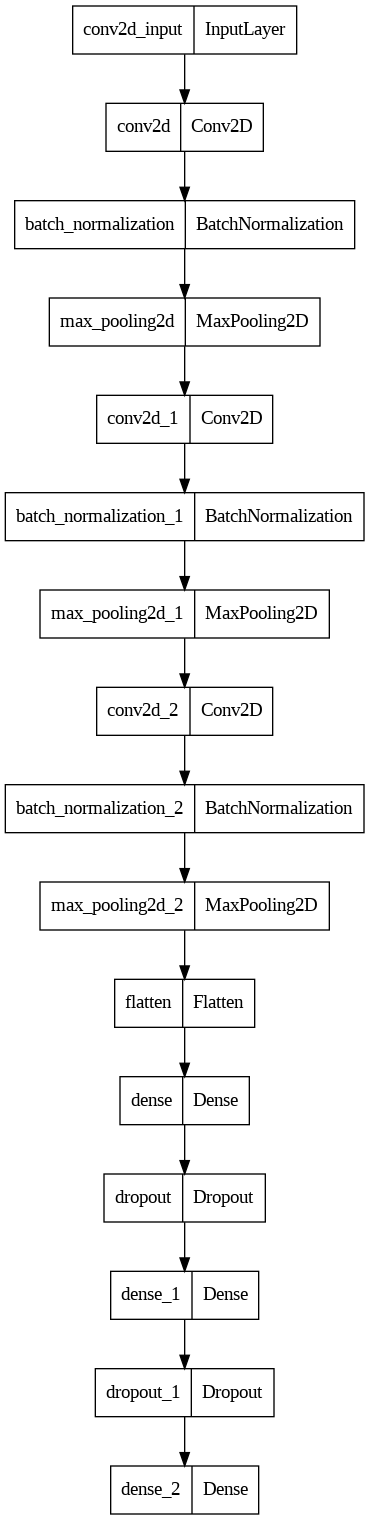

In [ ]:
plot_model(model)

## **Compiling and Training**

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))

Epoch 1/20
1253/1253 [==============================] - 28s 12ms/step - loss: 1.1292 - accuracy: 0.6807 - val_loss: 1.8164 - val_accuracy: 0.5831
Epoch 2/20
1253/1253 [==============================] - 11s 9ms/step - loss: 0.5233 - accuracy: 0.8388 - val_loss: 1.2108 - val_accuracy: 0.6819
Epoch 3/20
1253/1253 [==============================] - 12s 10ms/step - loss: 0.3588 - accuracy: 0.8878 - val_loss: 0.7075 - val_accuracy: 0.8062
Epoch 4/20
1253/1253 [==============================] - 11s 9ms/step - loss: 0.2726 - accuracy: 0.9149 - val_loss: 0.5677 - val_accuracy: 0.8511
Epoch 5/20
1253/1253 [==============================] - 11s 9ms/step - loss: 0.2122 - accuracy: 0.9348 - val_loss: 0.7235 - val_accuracy: 0.8158
Epoch 6/20
1253/1253 [==============================] - 12s 10ms/step - loss: 0.1847 - accuracy: 0.9425 - val_loss: 0.3560 - val_accuracy: 0.8996
Epoch 7/20
1253/1253 [==============================] - 10s 8ms/step - loss: 0.1501 - accuracy: 0.9529 - val_loss: 0.6276 - val

In [ ]:
model.save('CNNModel9894.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/Crop-Disease/CNNModel9894.h5')

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
y_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_prob, axis=1)
report = classification_report(y_test, y_pred, output_dict=True)

418/418 [==============================] - 9s 3ms/step


In [ ]:
# create a dataframe from the classification report
df = pd.DataFrame(report).transpose()

In [ ]:
df.tail()

,precision,recall,f1-score,support
37,0.930233,0.879121,0.903955,91.000000
38,0.994830,0.986091,0.990441,1366.000000
accuracy,0.945588,0.945588,0.945588,0.945588
macro avg,0.928437,0.926737,0.925231,13361.000000
weighted avg,0.948465,0.945588,0.944935,13361.000000


## **Graph**

In [ ]:
plt.style.use('dark_background')

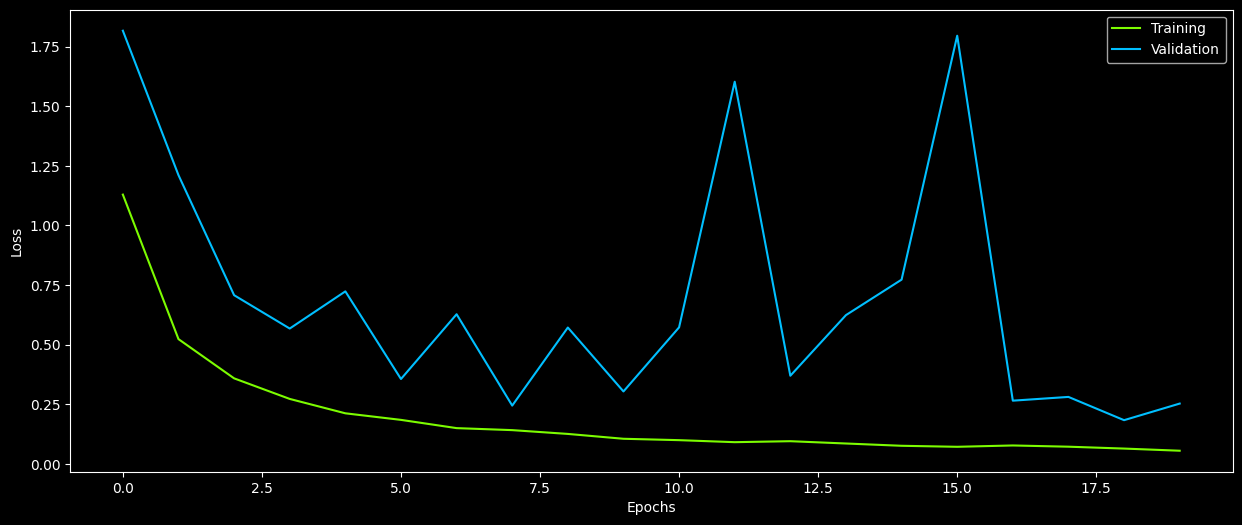

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(15,6))
plt.plot(epochs,loss,c="lawngreen",label="Training")
plt.plot(epochs,val_loss,c="deepskyblue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

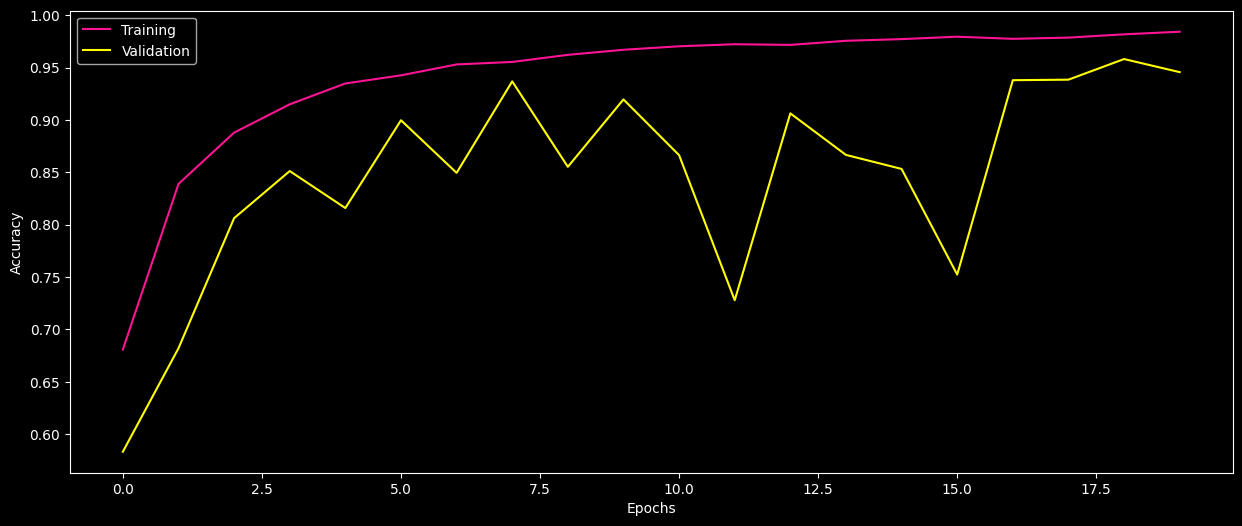

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(15,6))
plt.plot(epochs,acc,c="deeppink",label="Training")
plt.plot(epochs,val_acc,c="yellow",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()